# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
# Importing LIb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split,KFold

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor,plot_importance
import joblib


# Variable  Description


Item_Identifier  :  Unique product ID

Item_Weight  :  Weight of product

Item_Fat_Content  :  Whether the product is low fat or not

Item_Visibility  :  The % of total display area of all products in a store allocated to the particular product  

Item_Type  :  The category to which the product belongs

Item_MRP  :  Maximum Retail Price (list price) of the product

Outlet_Identifier  :  Unique store ID

Outlet_Establishment_Year  :  The year in which store was established

Outlet_Size  :  The size of the store in terms of ground area covered

Outlet_Location_Type  :  The type of city in which the store is located

Outlet_Type  :  Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales  :  Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
# Copying for the submission file 

test1 = test.copy()

In [5]:
# Checking the train and test files

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
# Assigning column for Merging the Train and Test

train['Heading'] = 'Train'
test['Heading'] = 'Test'

In [8]:
data = pd.concat([train,test],ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
# Checking the data 

data.head()

,Heading,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Train,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Train,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Train,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Train,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Train,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [10]:
# Shape of the data after sucessful concatination 

print ('The shape of the newly created dataframe data is. ' , data.shape )

The shape of the newly created dataframe data is.  (14204, 13)


# Data Visualisation 

In [ ]:
# Univaritate Analysis


In [31]:
# Checking the statistical features

data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Years
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.070034,12.759739,1997.830681,21.169319
std,62.086938,1706.499616,0.048602,4.234851,8.371664,8.371664
min,31.290000,33.290000,0.003575,4.555000,1985.000000,10.000000
25%,94.012000,834.247400,0.033143,9.300000,1987.000000,15.000000
50%,142.247000,1794.331000,0.062347,12.600000,1999.000000,20.000000
75%,185.855600,3101.296400,0.094037,16.000000,2004.000000,32.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,34.000000


In [11]:
# Checking for null values 

data.isnull().sum()

Heading                         0
Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [26]:
data.columns

Index(['Heading', 'Item_Fat_Content', 'Item_Identifier', 'Item_MRP',
       'Item_Outlet_Sales', 'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
       'Item_Type_Combined', 'Outlet_Years'],
      dtype='object')

In [47]:
data.dtypes

Heading                       object
Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Item_Type_Combined            object
Outlet_Years                   int64
dtype: object

In [12]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Heading
Train    8523
Test     5681
Name: Heading, dtype: int64

Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories fo

# Data Visualisation 

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


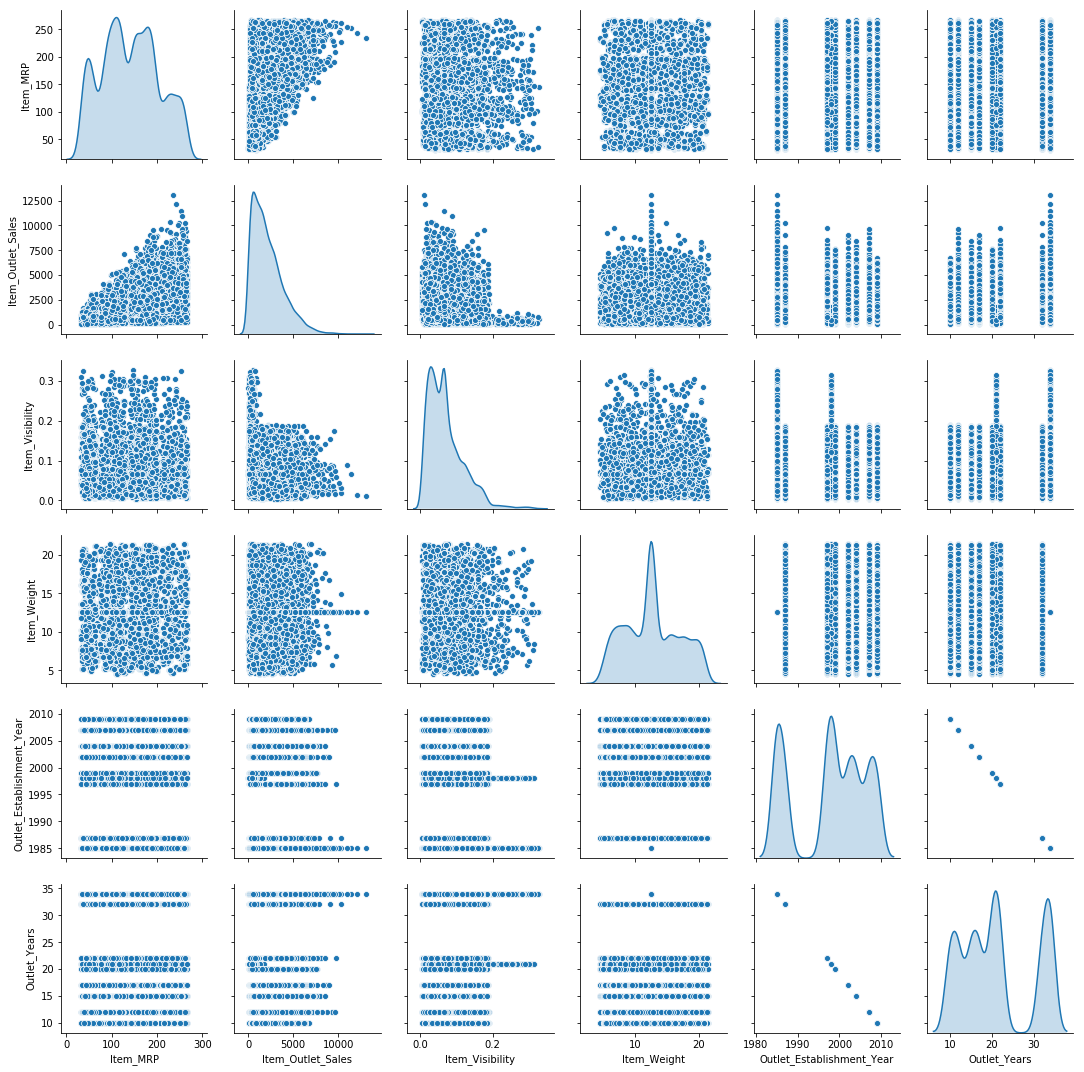

In [27]:
sns.pairplot(data,diag_kind='kde')

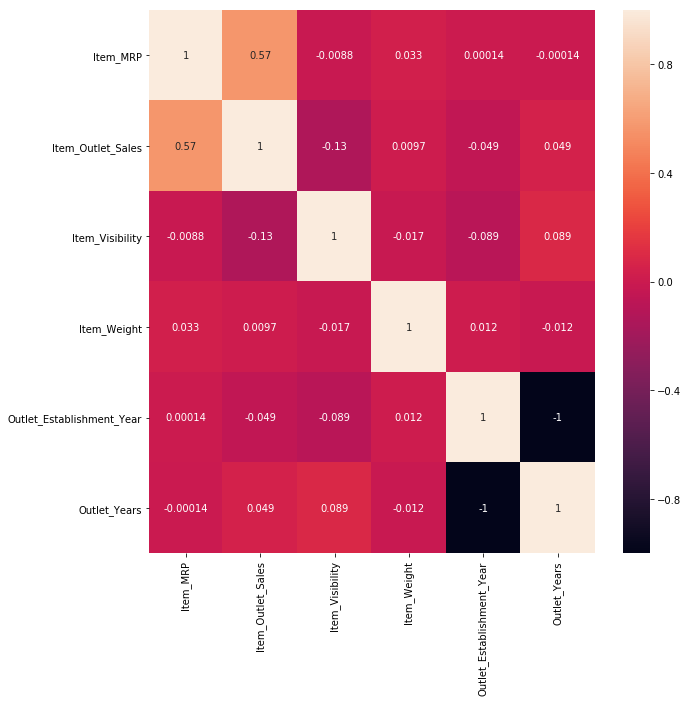

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

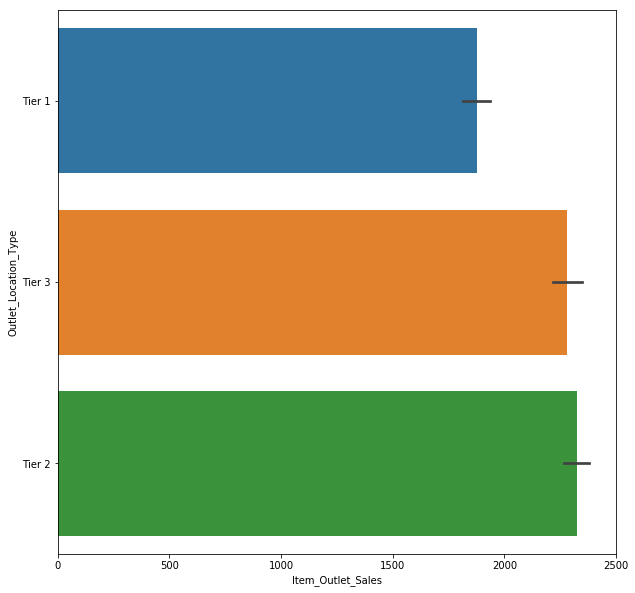

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Location_Type' , data = data)

# Data filling missing values 

In [13]:
# Item weight filling missing values with the median 

median = data.Item_Weight.median()

In [14]:
# Using the fillna way to fill the missing values 

data['Item_Weight'] = data['Item_Weight'].fillna(median)

In [15]:
# Verifying that the values have been filled 

data.isnull().sum()

Heading                         0
Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [16]:
# Checking the unique values for Outlet Size 

print ( 'The unique values in the Outlet size are : ',data.Outlet_Size.unique())

print ()

print ( 'We see that Outlet Size has nan values which we will fill with the mode')

The unique values in the Outlet size are :  ['Medium' nan 'High' 'Small']

We see that Outlet Size has nan values which we will fill with the mode


In [17]:
# Filling the data with mode using fill na

data['Outlet_Size'] = data['Outlet_Size'].fillna(data.Outlet_Size.mode()[0])

In [18]:
# Verifying that the data has been filled 

data.isnull().sum()

Heading                         0
Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

We see that Item visibility has valuesa as 0 as well which means that it is not visible whereas it should be. Therefore we replace the 0's with the mean

In [19]:
# Filling 0 with mean

mean = data['Item_Visibility'].mean()

In [20]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0,mean)

# Feature Encoding 

We have also known that the first two letter of the Item Identity represent a particular Item so we make a new feature and seperate them accordingly 

In [21]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()



Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [22]:
#Years: we create a new column showing the age of the outlet as the older the outlet the better it is known amongst the people 
data['Outlet_Years'] = 2019 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        21.169319
std          8.371664
min         10.000000
25%         15.000000
50%         20.000000
75%         32.000000
max         34.000000
Name: Outlet_Years, dtype: float64

In [23]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [24]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()



Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [25]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [48]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [49]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [50]:
data.columns

Index(['Heading', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier', 'Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [51]:
#Drop the columns which have been converted to different types:
data.drop((['Item_Type','Outlet_Establishment_Year']),axis = 1,inplace=True)



In [52]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Heading                       object
dtype: object

In [53]:
#Divide into test and train:
train = data.loc[data['Heading']=="Train"]
test = data.loc[data['Heading']=="Test"]

print (train.shape)
print( test.shape)

(8523, 34)
(5681, 34)


In [54]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','Heading','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
train.drop(['Heading','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [55]:

print (train.shape)
print( test.shape)

(8523, 31)
(5681, 30)


In [56]:
X = train.drop('Item_Outlet_Sales',axis = 1)
print(X.shape)

(8523, 30)


In [57]:
y = train['Item_Outlet_Sales']
print(y.shape)

(8523,)


In [58]:
#functions
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    removed=[]
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print(s.index[0],', VIF: ',s.iloc[0])
            removed.append(s.index[0])
        else:
            break
    return removed
            
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    """This function plot validation curve.
    
    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        scoring: str
    """
    n=len(param_range)
    if scoring=='r2':
        train_score=[scores[0][i].mean() for i in range (0,n)]
        test_score=[scores[1][i].mean() for i in range (0,n)]
    elif scoring=='neg_mean_squared_error':
        train_score=[np.sqrt(-scores[0][i].mean()) for i in range (0,n)]
        test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]

    fig=plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()

In [59]:
# Checking VIF

#4. Check multicolinearity
removed_by_vif=remove_by_vif(X.copy())
# removed_by_vif=['p','j','c']
X=X.drop(removed_by_vif,axis=1)

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Outlet_9 , VIF:  inf
Outlet_8 , VIF:  inf
Outlet_7 , VIF:  inf
Outlet_6 , VIF:  inf
Outlet_5 , VIF:  inf
Outlet_4 , VIF:  inf
Outlet_3 , VIF:  inf
Outlet_Size_1 , VIF:  inf
Outlet_Size_0 , VIF:  inf
Outlet_Type_1 , VIF:  inf
Outlet_Location_Type_2 , VIF:  inf
Outlet_0 , VIF:  inf
Item_Fat_Content_0 , VIF:  inf
Item_Fat_Content_1 , VIF:  inf
Outlet_Years , VIF:  160.63446379252392
Item_Type_Combined_1 , VIF:  41.27008269523576
Item_Weight , VIF:  8.50656733941911
Item_MRP , VIF:  5.441699608690241


In [91]:
# Checking VIF

#4. Check multicolinearity
removed_by_vif=remove_by_vif(test.copy())
# removed_by_vif=['p','j','c']
test=test.drop(removed_by_vif,axis=1)

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Outlet_9 , VIF:  inf
Outlet_8 , VIF:  inf
Outlet_7 , VIF:  inf
Outlet_6 , VIF:  inf
Outlet_5 , VIF:  inf
Outlet_4 , VIF:  inf
Outlet_3 , VIF:  inf
Outlet_Size_1 , VIF:  inf
Outlet_Size_0 , VIF:  inf
Outlet_Type_1 , VIF:  inf
Outlet_Location_Type_2 , VIF:  inf
Outlet_0 , VIF:  inf
Item_Fat_Content_0 , VIF:  inf
Item_Fat_Content_1 , VIF:  inf
Outlet_Years , VIF:  160.67875035793506
Item_Type_Combined_1 , VIF:  39.835263162890705
Item_Weight , VIF:  8.511390814113547
Item_MRP , VIF:  5.5291998389470765


In [60]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=60)

In [62]:
#scaling
std=StandardScaler()
X_train_scaled=pd.DataFrame(std.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_val_scaled=pd.DataFrame(std.transform(X_val),columns=X_val.columns,index=X_val.index)
X_test_scaled=pd.DataFrame(std.transform(X_test),columns=X_test.columns,index=X_test.index)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


In [63]:
scoring='neg_mean_squared_error'

In [64]:
lr=LinearRegression()
scores=cross_val_score(lr,X_train_scaled,y_train,n_jobs=-1,cv=5,scoring=scoring)
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  1496.7140569557212


In [65]:
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
# Result on test
y_train_pred=lr.predict(X_train_scaled)
y_val_pred=lr.predict(X_val_scaled)
y_pred_lr=np.append(y_train_pred,y_val_pred)
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))



Train RMSE: 1493.273540134565
Test RMSE: 1488.9026501131405


In [69]:
import xgboost as xgb

In [70]:
# Baseline Model
xgb=XGBRegressor(random_state=50)
xgb.fit(X_train_scaled,y_train)
y_train_pred=xgb.predict(X_train_scaled)
y_val_pred=xgb.predict(X_val_scaled)
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:13:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1441.4746946834603
Test RMSE: 1481.7087604502833


In [71]:
pip install scikit-learn==0.20.3

Note: you may need to restart the kernel to use updated packages.


## Bayesian optimization is a probabilistic model based approach for finding the minimum of any function that returns a real-value metric.

In [72]:
from skopt import BayesSearchCV

In [73]:
# Bayesian Optimization
opt = BayesSearchCV(
    estimator = XGBRegressor(
        n_jobs = -1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 20),
        'max_depth': (3, 5),
#         'max_delta_step': (0, 20),
        'subsample': (0.1, 1.0, 'uniform'),
        'colsample_bytree': (0.1, 1.0, 'uniform'),
        'colsample_bylevel': (0.1, 1.0, 'uniform'),
        'reg_lambda': (1e-3, 1000, 'log-uniform'),
        'reg_alpha': (1e-3, 1.0, 'log-uniform'),
#         'gamma': (1e-9, 0.5, 'log-uniform'),
        'base_score':((1e-4, 0.5, 'log-uniform'))
    },    
    scoring = scoring,
    cv =3,
    n_jobs = -1,
    refit = True,
    random_state = 42
)

opt.fit(X_train_scaled,y_train)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:15:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


BayesSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, tree_method='approx', verbosity=1),
       fit_params=None, iid=True, n_iter=50, n_jobs=-1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
       refit=True, return_train_score=False,
       scoring='neg_mean_squared_error',
       search_spaces={'learning_rate': (0.01, 1.0, 'log-uniform'), 'min_child_weight': (0, 20), 'max_depth': (3, 5), 'subsample': (0.1, 1.0, 'uniform'), 'colsample_bytree': (0.1, 1.0, 'uniform'), 'colsample_bylevel': (0.1, 1.0, 'uniform'), 'reg_l

In [74]:
opt.best_params_

{'base_score': 0.056487754493163206,
 'colsample_bylevel': 0.7172300168516182,
 'colsample_bytree': 0.7859637797768332,
 'learning_rate': 0.07108366616107524,
 'max_depth': 3,
 'min_child_weight': 5,
 'reg_alpha': 0.0029226572245370803,
 'reg_lambda': 0.7854116696876665,
 'subsample': 0.5232751464561946}

In [75]:
#Tuned Model
xgb=XGBRegressor(random_state=51,n_jobs=-1,**opt.best_params_)
xgb.fit(X_train_scaled,y_train)
y_train_pred=xgb.predict(X_train_scaled)
y_val_pred=xgb.predict(X_val_scaled)
y_pred_xgb=np.append(y_train_pred,y_val_pred)
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

[07:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1469.2658655983073
Test RMSE: 1488.1847268562522


In [93]:
test_pred = xgb.predict(test)
test_pred


array([2443.9697, 2486.3884, 2272.8027, ..., 2239.0918, 2333.0256,
       2377.6853], dtype=float32)

In [76]:
#cross-val-score
xgb=XGBRegressor(random_state=50,**opt.best_params_)
scores=cross_val_score(xgb,X_train_scaled,y_train,n_jobs=-1,cv=3,scoring=scoring)
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  1493.4682311210743


In [77]:
#Feature importance
xgb=XGBRegressor(random_state=51,n_jobs=-1,**opt.best_params_)
xgb.fit(X_train_scaled,y_train)
pd.DataFrame(xgb.feature_importances_,index=X_train.columns).sort_values(0,ascending=False).head()

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:17:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,0
Outlet_Type_0,0.516670
Outlet_Type_3,0.251254
Outlet_Type_2,0.044019
Outlet_Location_Type_1,0.043638
Item_Visibility,0.038041


In [78]:
# Stacking

y_pred_stack=(y_pred_lr+y_pred_xgb)/2

In [79]:
y_train_pred=y_pred_stack[:len(y_train)]
y_val_pred=y_pred_stack[len(y_train):]
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

Train RMSE: 1479.8932719972654
Test RMSE: 1487.398151356372


In [80]:
X_train_1=pd.concat([X_train_scaled,X_val_scaled])
y_train_1=pd.concat([y_train,y_val])

In [94]:
lr.fit(X_train_1,y_train_1)
y_pred_lr=lr.predict(X_test_scaled)

In [95]:
# XGB
xgb=XGBRegressor(random_state=51,n_jobs=-1,**opt.best_params_)
xgb.fit(X_train_1,y_train_1)
y_pred_xgb=xgb.predict(X_test_scaled)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:21:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: 1454.5231850610792


In [96]:
#Stack
y_pred_stack=(y_pred_lr+y_pred_xgb)/2
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_stack)))

Test RMSE: 1459.0152621304185


In [97]:
# Data preparation
X_scaled=pd.DataFrame(std.fit_transform(X),columns=X.columns,index=X.index)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [98]:
y_pred_lr=lr.predict(test)
y_pred_xgb=xgb.predict(test)
y_pred_stacked=(y_pred_lr+y_pred_xgb)/2

In [106]:
sub = pd.DataFrame({'Item_Identifier': test1.Item_Identifier,
                    'Outlet_Identifier' : test1.Outlet_Identifier,
                       'Item_Outlet_Sales': y_pred_stacked})

In [107]:
sub.to_csv('submissionBayesian.csv' , index = False)

In [108]:
sublr = pd.DataFrame({'Item_Identifier': test1.Item_Identifier,
                    'Outlet_Identifier' : test1.Outlet_Identifier,
                       'Item_Outlet_Sales': y_pred_lr})

sublr.to_csv('submissionlr.csv' , index = False)

In [109]:
subxgb = pd.DataFrame({'Item_Identifier': test1.Item_Identifier,
                    'Outlet_Identifier' : test1.Outlet_Identifier,
                       'Item_Outlet_Sales': y_pred_xgb})

subxgb.to_csv('submissionxgb.csv' , index = False)